<center>
<table style="border:none">
    <tr style="border:none">
    <th style="border:none">
        <a  href='https://colab.research.google.com/github/AmirMardan/ml_course/blob/main/6_classical_machine_learning/2_regression_1.ipynb'><img src='https://colab.research.google.com/assets/colab-badge.svg'></a>
    </th>
    <th style="border:none">
        <a  href='https://github1s.com/AmirMardan/ml_course/blob/main/6_classical_machine_learning/2_regression_1.ipynb'><img src='../imgs/open_vscode.svg' height=20px width=115px></a>
    </th>
    </tr>
</table>
</center>


This notebook is based on the notebook by  <a href='https://amirmardan.github.io'> Amir Mardan</a>. For any feedback or suggestion, please contact me via <a href="mailto:mardan.amir.h@gmail.com">email</a>, (mardan.amir.h@gmail.com).



<a name='top'></a>
# Regresión lineal

- La regresión lineal es un algoritmo de aprendizaje automático 
- Es supervisado: usaremos "etiquetas" para que la IA pueda aprender
- Se usa para predecir valores continuos


En este cuaderno, aprenderemos cómo usar
- [Introduccion](#Intro)
- [Ejemplo de regresion lineal simple](#Ej)
- [Funcion de Costo](#F_Costo)
- [Descenso por gradiente](#D_gradiente)
- [Regresion lineal multiple](#R_multiple)
- [Overfitting](#Overfitting)


In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


<a id='least_square'></a>
## Regresion lineal

<a name=Intro><a/>
### Introducción a la Regresión Lineal

La regresión lineal es una técnica que nos permite entender y predecir relaciones entre variables. Imagina que tienes datos sobre el precio de diferentes casas y quieres saber cómo se relaciona el tamaño de una casa con su precio. La regresión lineal nos ayuda a responder esa pregunta.

En su forma más básica, la regresión lineal busca una línea recta que represente la relación entre dos variables: una variable se llama "variable dependiente" (el precio de las casas en nuestro ejemplo) y la otra se llama "variable independiente" (el tamaño de las casas en nuestro ejemplo). La regresión lineal intenta encontrar la mejor línea recta que se ajuste a los datos y pueda predecir el precio de una casa basándose en su tamaño.

Imagina que tienes un gráfico con puntos dispersos que representan las casas en función de su tamaño y precio. La regresión lineal trata de encontrar una línea recta que esté lo más cerca posible de todos los puntos. Esta línea recta se llama "línea de regresión" y se utiliza para hacer predicciones sobre el precio de una casa dado su tamaño.

La regresión lineal se basa en la suposición de que hay una relación lineal entre las variables: a medida que el tamaño de una casa aumenta, el precio tiende a aumentar (o disminuir si hay una relación negativa). La línea de regresión nos permite estimar cuánto cambiará el precio por cada cambio unitario en el tamaño de la casa.

La regresión lineal es ampliamente utilizada en machine learning debido a su simplicidad y facilidad de interpretación. Sin embargo, también se pueden aplicar técnicas más avanzadas como la regularización para mejorar la capacidad de generalización del modelo.

En resumen, la regresión lineal es una herramienta poderosa para comprender y predecir relaciones entre variables. Nos permite encontrar una línea recta que represente la relación entre una variable dependiente y una variable independiente, y usar esa línea para hacer predicciones.


<a name=Ej></a>
### Ejemplo de regresion lineal
- Imaginemos que tenemos un conjunto de datos para ***entrenar*** nuestro modelo de Machine Learning. 
- Un par, (x,y) es una muestra de entrenamiento,y el conjunto de datos de entrenamiento sera:
$
\{ (x^{(1)}, y^{(1)}), (x^{(2)}, y^{(2)}), (x^{(3)}, y^{(3)}), \ldots, (x^{(m)}, y^{(m)}) \}
$ es nuestro dataset de entrenamiento.
- Nuestro objetivo es utilizar el dataset de entrenamiento para aprender la funcion h:X-->Y de tal manera que $h(x)$ nos de una *buena estimacion* de la variable respuesta $y$. 
- Una funcion simple puede ser: $h_w(x) = w_1x + w_0 $. Tengan en cuenta que esto nos data una ***recta***. De ahi que se llame ***funcion lineal***
- $w_0$ y $w_1$ son comunmente llamados ***pesos***



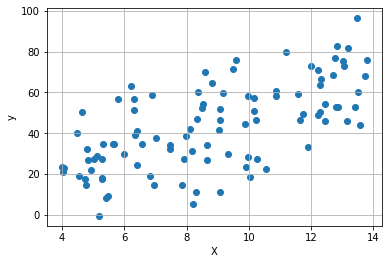

Los coeficientes a los que deberiamos llegar son: w0=0, y w1=5
Es decir la recta que deberia ajustarse a los datos seria: y = 5x + 0
Recuerden que hay mucho ruido aleatorio asi que es probable que no lleguemos a exactamente esos valores


In [100]:
# Podemos inventarnos un dataset

# b es una constante que la podemos pensar como la "ordenada al origen"
# Imaginemos que estamos prediciendo el precio de casas, b seria el precio base, o quizas lo podriamos 
# imaginar como el precio del terreno. Es decir, una casa con 0 habitaciones, 0 pies cuadrados construidos sigue
# teniendo valor por estar, por ejemplo en un terreno con servicios. 

# Las proximas lineas de codigo definen un vector X, que son numeros aleatorios, y un vector Y, 
# que toman el valor de X, mas un ruido aleatorio

# Primero, eligamos los parametros w0 y w1 que mencionamos antes al azar. 

RUIDO = 15 # seleccionamos cuanto se ajustan a la teoria los datos. Mientras mas grande sea el ruido, 
# mas dispersion tendran los datos

w0 = 0 # Para simplificar la teoria, aceptamos que w0 es 0, asi que nos concentramos en ajustar w1
w1 = 5


def linear_data(x, rng):
    ruido_aleatorio = RUIDO * rng.randn(x.shape[0], x.shape[1])
    return ruido_aleatorio + w1 * x + w0

rng = np.random.RandomState(23)

X = 4 + 10 * rng.random((100, 1)) # conjuntos de datos de entrenamiento
y = linear_data(X, rng)

x_test = np.arange(3, 15, .1) # conjunto de datos de testeo 
x_test = x_test[:, np.newaxis]


# finalmente, graficamos nuestros datos
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(X, y)
ax.set_xlabel('X')
ax.set_ylabel('y')
ax.grid()
plt.show()
print(f'Los coeficientes a los que deberiamos llegar son: w0={w0}, y w1={w1}')
print(f'Es decir la recta que deberia ajustarse a los datos seria: y = {w1}x + {w0}')
print('Recuerden que hay mucho ruido aleatorio asi que es probable que no lleguemos a exactamente esos valores')

<a name=F_Costo></a>
### Funcion de costo
- Para poder ***testear*** si los pesos nos dan buenas predicciones, necesitamos ver cuan cerca nuestra funcion $h(x)$ se ajusta a los datos *reales* $y$.
- Definamos ahora una ***funcion de costo*** formalmente:
$$
L(W) = \frac{1}{2} \sum_{i=1}^{m} (h_w(xi^{(i)}) - y^{(i)})^2
$$
Oh no, matematica!🥵 
No se preocupen, si lo piensan es bastante intuitivo. Tomamos nuestro dato predicho $h_w(xi^{(i)}$, lo comparamos (vemos la *diferencia*) con nuestro dato "real" $y^{(i)}$.
Hacemos eso para cada uno de nuestros datos, que son del dato numero 1 hasta el m. Sumamos todas esas diferencias. Eso es lo escencial, no se preocupen por que elevamos al cuadrado, o dividimos por 2 (algunas funciones de costo dividen por m).  
- Mientras menor sea nuestra funcion de costo, mejor le esta yendo a nuestro modelo 🤓

OK, podriamos seguir con el codigo, y que el modulo `sklearn` haga su magia, pero, cual es esa magia? 🪄


<a name=D_gradiente></a>
### Descenso por gradiente
![Gif de descenso por gradiente](./gradient_descent_notebook.gif)



El ***descenso por gradiente*** es la base del Machine Learning. Es lo que permite utilizar modelos simples como los que estamos viendo, como increiblemente complejos, como las redes neuronales profundas, que veremos mas adelante en el curso. 

- Matematicamente, lo que esta sucediendo es que elegimos una recta al azar (hacemos estos eligiendo los pesos $w_0$ y $w_1$ al azar) y calculamos la funcion de costo. 
- A la derecha vemos la recta elegida al azar, y a la izquierda vemos su costo. 
- Luego, calculamos la ***derivada***. Pueden pensar en la derivada como la *pendiente* de nuestra funcion. Nos dice en que direccion nos tenemos que mover para acercarnos a ese minimo de la funcion de costo. 
- Como queremos *minimizar* la funcion de costo, modificamos los pesos en la ***direccion*** que nos indica el la derivada. 
- Cada vez que modificamos los pesos, recalculamos la funcion de costo. Esto es una *iteracion*
- Iteramos las veces que sea necesario para llegar a un ***minimo***

Todo esta esta implementado en la clase LinearRegression de sklearn. Veamoslo en accion. 


### Definicion de hiperparametros

En aprendizaje automático (Machine Learning), durante el proceso de aprendizaje se evalúan y mejoran numerosos parámetros. Por el contrario, un hiperparámetro es una variable cuyo valor se establece antes del entrenamiento, por lo que ni se evalúa ni se corrige.

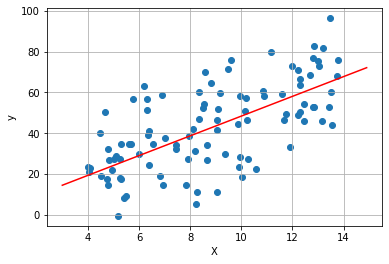

In [120]:
from sklearn.linear_model import SGDRegressor # paso 1: seleccionamos el modelo

y = y.ravel() # aca estamos cambiando las dimensiones del array, para que no se queje el programa  

model = SGDRegressor(fit_intercept=False, max_iter=100000, learning_rate='constant',eta0=0.000001) #paso 2: seleccionar hiperparametros

model.fit(X,y.ravel()) # paso 3: entrenar el modelo

y_est = model.predict(x_test) # paso 4: Predecir para los datos del test

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(X, y)
ax.plot(x_test, y_est, 'r')
ax.set_xlabel('X')
ax.set_ylabel('y')
ax.grid()



[Vean hiperparametros de SGDRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html)

In [121]:
# Valor de w
print(f"w1 es igual a {round(model.coef_[0],2)}")

w1 es igual a 4.84


In [122]:
# Valor de b
model.intercept_[0] # aqui le aclaramos que no necesitabamos este calculo, asi que lo dejo en cero

0.0

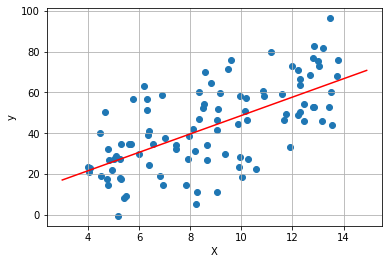

In [123]:
# Tambien podemos utilizar el modelo de LinearRegression, que utiliza el modulo scipy para calcular una solucion
# exacta. Este metodo NO utiliza descenso por gradiente...
from sklearn.linear_model import LinearRegression  # paso 1: seleccionar el modelo

model = LinearRegression(fit_intercept=True)  # paso 2: seleccionar hiperparametros

model.fit(X, y)  # paso 3: entrenar el modelo

y_est = model.predict(x_test)  # paso 4: Predecir para los datos de test

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(X, y)
ax.plot(x_test, y_est, 'r')
ax.set_xlabel('X')
ax.set_ylabel('y')
ax.grid()


In [125]:
print(f"w1 es igual a {round(model.coef_[0],2)}")
print(f"La ordenada al origen es {round(model.intercept_,2)}")


w1 es igual a 4.51
La ordenada al origen es 3.57


Si quieren una base teorica excelente, con graficos etc, una excelente opcion en Scikit learn. Les dejo el link que trata con los hiperparametros: Lasso, Ridge, y elastic net, muy utilizados. 
[Scikitlearn Hiperparametros](https://scikit-learn.org/stable/modules/linear_model.html#ridge-regression-and-classification)

<a name=R_multiple></a>
## Regresión Lineal Múltiple

La **regresión lineal múltiple** es una extensión de la regresión lineal simple que utilizamos previamente, y se utiliza cuando tenemos más de una característica independiente que podría influir en nuestra característica objetivo.

En la regresión lineal simple, modelamos la relación entre una característica independiente X y la característica dependiente Y como una línea recta. En la regresión lineal múltiple, en cambio, tratamos de modelar la relación entre dos o más características independientes y una característica dependiente mediante el ajuste de una superficie hiperplana.

La ecuación de la regresión lineal múltiple es muy similar a la de la regresión lineal simple, pero se añaden términos para las características adicionales:

$h_w(x) = w_0 + w_1x_1 + w_2 x_2 + w_3 x_3 .... + w_n x_n$

Donde:
- y es la característica dependiente.
- $w_0$ es la ordenada en el origen.
- $w_1, w_2,..., w_n$ son los coeficientes de las características independientes $x_1, x_2,..., xn$.

En términos de machine learning, nuestro objetivo es usar los datos disponibles para aprender los coeficientes $w_0, w_1, w_2,..., w_n$ que minimicen el error en nuestras predicciones.

La regresión lineal múltiple asume que existe una relación lineal entre las variables independientes y la variable dependiente. Si esta suposición no se cumple, los resultados pueden ser engañosos.

Por último, es importante mencionar que la regresión lineal múltiple puede ser susceptible a problemas como la multicolinealidad, es decir, cuando las variables independientes están altamente correlacionadas entre sí. Esto puede hacer que el modelo sea inestable y que los coeficientes sean difíciles de interpretar. Por lo tanto, es importante siempre revisar las correlaciones entre las variables independientes antes de ajustar el modelo.


In [126]:
RUIDO = 0
w0 = 1
w1 = 2
w2 = 5
X1 = 4 + 2.0 * rng.rand(100,1)
X2 = 1.0 * rng.rand(100,1)
answer_v = w0 + w1 * X1 + w2 * X2 + RUIDO * rng.rand(100,1)

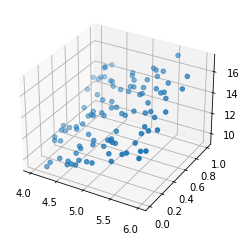

In [127]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = X1
y = X2
z = answer_v

ax.scatter(x,y,z)
plt.show()

Equation: y = 1.00 + 2.01x1 + 4.88x2


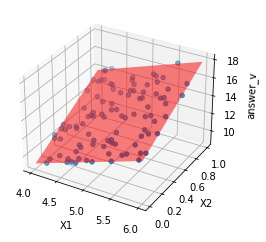

In [128]:
lr_multiple = SGDRegressor(fit_intercept = True, max_iter = 1000, tol = 0.00001)
# el parametro `tol` disminuye la tolerancia del modelo. Si seteamos un tol muy pequeno, el model seguira
# intentando mas tiempo disminuir el error. 

X = np.array([X1.ravel(),X2.ravel()]).T # .T sirve para "transponer" la matriz, sino sklearn intenta interpretar algo
# que tiene 100 caracteristicas y dos muestras, en vez de 2 caracteristicas con 100 muestras cada una. 

y = answer_v.ravel()

lr_multiple.fit(X, y) #entrenamos el modelo

# Graficamos 
coefs = lr_multiple.coef_ # el atributo coef nos da un vector con los pesos, uno por cada caracteristica. 
intercept = lr_multiple.intercept_
num_samples = len(X)

x = X[:,0]
y = X[:,1]
z = answer_v

xs = np.tile(np.sort(x), (num_samples, 1))
ys = np.tile(np.sort(y), (num_samples, 1)).T
zs = xs*coefs[0] + ys*coefs[1] + intercept[0]

print(f"Equation: y = {intercept[0]:.2f} + {coefs[0]:.2f}x1 + {coefs[1]:.2f}x2")

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("answer_v")

ax.scatter(x, y, z)
ax.plot_surface(xs, ys, zs, alpha=0.5, color='r', rstride=100, cstride=100)

plt.show()

In [129]:
# Comparamos los coeficientes obtenidos con los reales
print(lr_multiple.coef_.round(2))
print(w1, w2)

[2.01 4.88]
2 5


In [130]:
print(lr_multiple.intercept_[0].round(2))
print(w0)

1.0
1


<a name=F_Costo></a>
### Overfitting
Cuando estamos haciendo modelos, nos podemos topar con un problema comun, llamado ***overfitting***. 
Este es un concepto muy importante para el machine learning, ya que casi siempre es un problema a resolver. 
Tipicamente, en proyectos reales, separamos de antemano una porcion de los datos, esto sera nuestro *set de testeo*, que se mantendra separado de nuestro *set de entrenamiento*, que es el que vera nuestro modelo. Ahora, casi siempre nuestro modelo obtiene mejores resultados cuando lo evaluamos con nuestro set de entrenamiento, pero cuando los resultados son mucho mejores en el entrenamiento que en el set de testeo, hablamos de ***overfitting***. Significa que nuestro modelo no es generalizable, sino que "memorizo" los datos que le brindamos. 
 Esto es poco comun con regresiones lineales y mas comun con modelos mas complejos que veremos mas adelante. Sin embargo, si se enfrentan a este problema, pueden acceder a diferentes estrategias para evitar el overfitting [aqui](https://scikit-learn.org/stable/modules/linear_model.html).



It's clear that increasing the training size, improves the linear regression.
Also, the overfitting of the decision tree is obvious.

### [TOP ☝️](#top)